#Part A. Build a baseline model

In [31]:
import pandas as pd
import numpy as np
import keras

In [32]:
df = pd.read_csv("https://cocl.us/concrete_data")

In [33]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Checking for NA Values

In [34]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Defining the Features and the target

In [35]:
X = df.drop("Strength", axis=1)
y = df.loc[:, "Strength"]

X.shape, y.shape

((1030, 8), (1030,))

Train/Test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

Creating the model

In [37]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(10, activation="relu", input_shape=(X.shape[1],)))
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

Training the model on 50 epochs

In [38]:
model = build_model()

model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 130594.3411
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 59068.6527
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 22795.5809
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 8380.2862
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 3483.7843
Epoch 6/50
23/23 [==============================] - 0s 1ms/step - loss: 2376.5243
Epoch 7/50
23/23 [==============================] - 0s 1ms/step - loss: 2061.6251
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 1920.7847
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 1888.3338
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 1767.6255
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 1728.3119
Epoch 12/50
23/23 [==============================] - 0s 1ms/step - loss: 1650.2128
Epoch 13/

Mean Squared Error

In [39]:
from sklearn.metrics import mean_squared_error

predicted_y = model.predict(X_test)
mse = mean_squared_error(y_test, predicted_y)
print(f"Test MSE: {mse}")

Test MSE: 621.8523874489485


Repeat 50 times

In [40]:
def repeatloop(n=50):
    mse_list = []
    for index in range(n):
        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # build model
        model = build_model()
        
        # train model
        model.fit(X_train, y_train, epochs=50, verbose=0)
        
        # predict test set
        predicted_y = model.predict(X_test)
        
        # get MSE for the model
        mse = mean_squared_error(y_test, predicted_y)
        print(f"MSE {index}: {mse}")
        
        # append to list
        mse_list.append(mse)
    return mse_list

In [41]:
mse_list = repeatloop(50)

MSE 0: 438.30752620456167
MSE 1: 217.1373786715714
MSE 2: 85.19351914937732
MSE 3: 640.2332115948162
MSE 4: 863.9836815232904
MSE 5: 353.065334230571
MSE 6: 138.38020321114837
MSE 7: 554.4938605056055
MSE 8: 445.2757378115334
MSE 9: 126.19939321244361
MSE 10: 115.6661395751708
MSE 11: 146.4708025266771
MSE 12: 191.62678015447847
MSE 13: 221.54335634465
MSE 14: 107.38557618203794
MSE 15: 263.90577498871806
MSE 16: 122.50239782548893
MSE 17: 266.5686675963377
MSE 18: 131.639351642053
MSE 19: 126.40224772776817
MSE 20: 214.97232754409734
MSE 21: 147.41796510976414
MSE 22: 127.34776864395357
MSE 23: 292.61483733731615
MSE 24: 446.6847664679071
MSE 25: 238.53616957017945
MSE 26: 136.94603195161176
MSE 27: 150.70192632557118
MSE 28: 113.82732748935385
MSE 29: 692.0777014849717
MSE 30: 104.69628591014245
MSE 31: 82.61823140413053
MSE 32: 111.1664911213494
MSE 33: 114.92144824353372
MSE 34: 151.8544090807832
MSE 35: 188.93989822084495
MSE 36: 379.3300297900004
MSE 37: 306.98816333768883
MSE 38

Mean & Standar Deviation of MSEs

In [42]:
print(f"Average of MSEs: {np.mean(mse_list)}")
print(f"Standard Deviation MSEs: {np.std(mse_list)}")

Average of MSEs: 294.0452592221738
Standard Deviation MSEs: 270.97360004337185


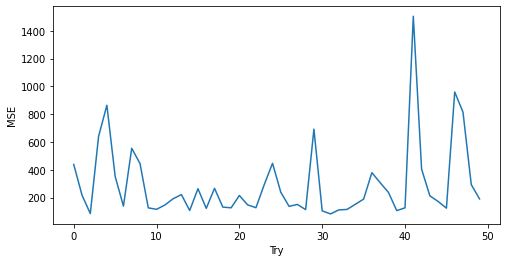

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(mse_list)
plt.xlabel("Try")
plt.ylabel("MSE")

plt.show()

#Part B. Normalize the data

In [44]:
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Repeat Part A but use a normalized version of the data

In [45]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=0.3)

X_train_norm.shape, X_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((721, 8), (309, 8), (721,), (309,))

In [46]:
model_norm = build_model()

model_norm.fit(X_train_norm, y_train_norm, epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 1530.3457
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 1517.7343
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 1477.5798
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 1405.8898
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 1479.0033
Epoch 6/50
23/23 [==============================] - 0s 1ms/step - loss: 1427.2481
Epoch 7/50
23/23 [==============================] - 0s 1ms/step - loss: 1442.4101
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 1399.9533
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 1348.7691
Epoch 10/50
23/23 [==============================] - 0s 985us/step - loss: 1349.3518
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 1234.4963
Epoch 12/50
23/23 [==============================] - 0s 1ms/step - loss: 1335.5751
Epoch 13/50

In [47]:
predicted_y_norm = model_norm.predict(X_test_norm)
mse_norm = mean_squared_error(y_test_norm, predicted_y_norm)
print(f"Test MSE: {mse_norm}")

Test MSE: 282.34166692703553


In [48]:
mse_list_norm = repeatloop(50)

MSE 0: 244.82082182666574
MSE 1: 553.9742468606968
MSE 2: 286.5631473883446
MSE 3: 135.40699754228297
MSE 4: 434.23058125457476
MSE 5: 98.50791107538154
MSE 6: 245.07666684191477
MSE 7: 1100.117277453484
MSE 8: 143.77239591660773
MSE 9: 117.47124822589916
MSE 10: 218.14835351804072
MSE 11: 101.85391782945197
MSE 12: 147.40564167169615
MSE 13: 153.07023725669552
MSE 14: 122.01085209995557
MSE 15: 292.7281236783941
MSE 16: 130.68446051034908
MSE 17: 594.2771938280134
MSE 18: 122.28541645365006
MSE 19: 120.82763096632777
MSE 20: 305.83038979999924
MSE 21: 583.4063951756576
MSE 22: 123.74441637379333
MSE 23: 155.4116191749566
MSE 24: 151.7770174991729
MSE 25: 310.05495758601535
MSE 26: 371.8419335398381
MSE 27: 133.63829261990034
MSE 28: 221.6387999545467
MSE 29: 844.228308687577
MSE 30: 118.27876721238218
MSE 31: 514.1987008779382
MSE 32: 96.43860371027024
MSE 33: 125.12232133722756
MSE 34: 244.73877031744533
MSE 35: 220.47217086135984
MSE 36: 156.17397196072187
MSE 37: 122.51660442352765

In [49]:
print(f"Average of MSEs: {np.mean(mse_list_norm)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_norm)}")

Average of MSEs: 279.86517482172144
Standard Deviation MSEs: 219.3703204296142


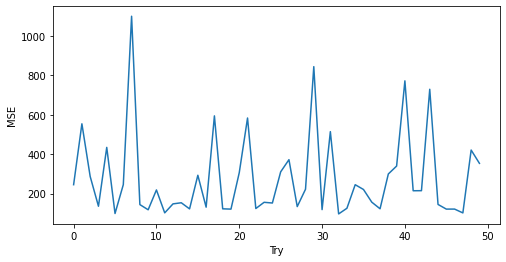

In [50]:
plt.figure(figsize=(8, 4))
plt.plot(mse_list_norm)
plt.xlabel("Try")
plt.ylabel("MSE")

plt.show()

Comparing A vs B

In [51]:
print("Without Normalization:")
print(f"Average of MSEs: {np.mean(mse_list)}")
print(f"Standard Deviation MSEs: {np.std(mse_list)}")
print("With Normalization:")
print(f"Average of MSEs: {np.mean(mse_list_norm)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_norm)}")

Without Normalization:
Average of MSEs: 294.0452592221738
Standard Deviation MSEs: 270.97360004337185
With Normalization:
Average of MSEs: 279.86517482172144
Standard Deviation MSEs: 219.3703204296142


#Part C. Reeat B but train for 100 epochs

In [52]:
model_norm_100 = build_model()

model_norm_100.fit(X_train_norm, y_train_norm, epochs=100, verbose=1)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 1499.3125
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 1493.6007
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 1546.2928
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 1522.4710
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 1447.8505
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 1496.8553
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 1451.6035
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 1399.9815
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 1366.0538
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 1391.2381
Epoch 11/100
23/23 [==============================] - 0s 1ms/step - loss: 1320.7808
Epoch 12/100
23/23 [==============================] - 0s 1ms/step - loss: 1365.7947
E

In [53]:
predicted_y_norm_100 = model_norm_100.predict(X_test_norm)
mse_norm_100 = mean_squared_error(y_test_norm, predicted_y_norm)
print(f"Test MSE: {mse_norm_100}")

Test MSE: 282.34166692703553


In [54]:
mse_list_norm_100 = repeatloop(50)

MSE 0: 118.38362020503543
MSE 1: 177.66147688108717
MSE 2: 828.408197255728
MSE 3: 168.8355705976423
MSE 4: 117.22125574944114
MSE 5: 133.1857174261364
MSE 6: 360.8172481494078
MSE 7: 116.22249393199387
MSE 8: 424.6859059445385
MSE 9: 254.5065157960355
MSE 10: 354.4818827362106
MSE 11: 194.59896316771997
MSE 12: 290.92358587847855
MSE 13: 112.3933180717095
MSE 14: 122.79202814562261
MSE 15: 112.8112907566232
MSE 16: 122.01765445127418
MSE 17: 237.56993488069378
MSE 18: 100.22138632871061
MSE 19: 114.75878727329241
MSE 20: 341.06843444005887
MSE 21: 355.5536411235866
MSE 22: 120.29342496327546
MSE 23: 218.007740743264
MSE 24: 610.5394697858399
MSE 25: 1466.404592990037
MSE 26: 249.68918744377504
MSE 27: 107.04006889446913
MSE 28: 131.8885882126016
MSE 29: 159.2339579382548
MSE 30: 264.546116347814
MSE 31: 251.63361686438506
MSE 32: 1413.211460723172
MSE 33: 643.013412160003
MSE 34: 779.4775028788595
MSE 35: 214.56528230821775
MSE 36: 103.85962665502092
MSE 37: 77.23248653905132
MSE 38: 

In [55]:
print(f"Average of MSEs: {np.mean(mse_list_norm_100)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_norm_100)}")

Average of MSEs: 277.9219659782091
Standard Deviation MSEs: 295.8755363455592


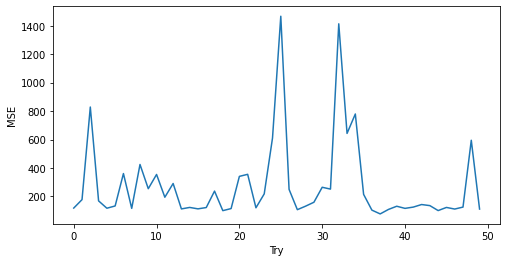

In [56]:
plt.figure(figsize=(8, 4))
plt.plot(mse_list_norm_100)
plt.xlabel("Try")
plt.ylabel("MSE")

plt.show()

Compare B vs C

In [57]:
print("50 Epochs:")
print(f"Average of MSEs: {np.mean(mse_list_norm)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_norm)}")
print("100 Epochs:")
print(f"Average of MSEs: {np.mean(mse_list_norm_100)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_norm_100)}")

50 Epochs:
Average of MSEs: 279.86517482172144
Standard Deviation MSEs: 219.3703204296142
100 Epochs:
Average of MSEs: 277.9219659782091
Standard Deviation MSEs: 295.8755363455592


#Part D. repeat part B but use three hidden layers, each of 10 nodes and ReLU activation function.


In [58]:
def build_new_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(10, activation="relu", input_shape=(X_norm.shape[1],)))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

In [59]:
model_new = build_new_model()

model_new.fit(X_train_norm, y_train_norm, epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 1656.4764
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 1584.8919
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 1452.3872
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 1373.0190
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 1394.9224
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 1283.6592
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 1097.5301
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 863.9108
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 646.3602
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 370.5670
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 277.3216
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 252.4322
Epoch 13/50
23/23 

In [60]:
predicted_y_new = model_new.predict(X_test_norm)
mse_new = mean_squared_error(y_test_norm, predicted_y_norm)
print(f"Test MSE: {mse_new}")

Test MSE: 282.34166692703553


In [61]:
mse_list_new = repeatloop(50)

MSE 0: 125.19441031216705
MSE 1: 260.76239895586775
MSE 2: 144.2249394712246
MSE 3: 387.3464675254296
MSE 4: 119.10552859057347
MSE 5: 242.97347805500826
MSE 6: 1133.819275815818
MSE 7: 122.56521599603299
MSE 8: 1851.0726626939875
MSE 9: 160.3184381042704
MSE 10: 180.96864954684682
MSE 11: 425.90236371692043
MSE 12: 132.82863837792033
MSE 13: 105.28825729183676
MSE 14: 277.2453740948742
MSE 15: 125.22024008825892
MSE 16: 619.1538226662383
MSE 17: 1710.394221002522
MSE 18: 2119.0960557786593
MSE 19: 131.10502332583073
MSE 20: 157.3538278111004
MSE 21: 223.60942720523911
MSE 22: 343.37974083976457
MSE 23: 379.5625692648664
MSE 24: 121.5747197737961
MSE 25: 141.94835555605528
MSE 26: 671.0556323101582
MSE 27: 397.5867910522535
MSE 28: 126.35917097307183
MSE 29: 89.69661323610377
MSE 30: 303.5066902594547
MSE 31: 153.2204502592325
MSE 32: 109.82620892496911
MSE 33: 129.22847179123178
MSE 34: 123.38123121642124
MSE 35: 291.19818854272575
MSE 36: 183.56143522062186
MSE 37: 1196.769239766987


In [62]:
print(f"Average of MSEs: {np.mean(mse_list_new)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_new)}")

Average of MSEs: 383.95541477464167
Standard Deviation MSEs: 448.96861762311073


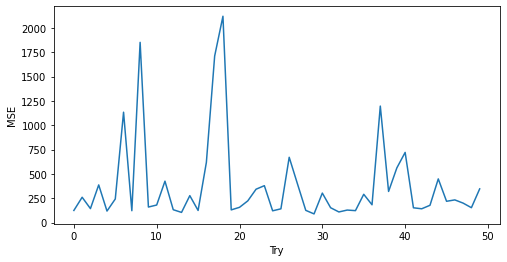

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(mse_list_new)
plt.xlabel("Try")
plt.ylabel("MSE")

plt.show()

Compare D vs B

In [64]:
print("1 Hidden Layer:")
print(f"Average of MSEs: {np.mean(mse_list_norm)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_norm)}")
print("3 Hidden Layers:")
print(f"Average of MSEs: {np.mean(mse_list_new)}")
print(f"Standard Deviation MSEs: {np.std(mse_list_new)}")

1 Hidden Layer:
Average of MSEs: 279.86517482172144
Standard Deviation MSEs: 219.3703204296142
3 Hidden Layers:
Average of MSEs: 383.95541477464167
Standard Deviation MSEs: 448.96861762311073
